In [1]:
# CHENGZHI DONG
# ID 112890166
# CSE 353 
# Assignment 5

In [2]:
# Import python libraries
import numpy as  np
import matplotlib.pyplot as plt

In [3]:
# Sigmoid function
def sig(s):
    result = 1/(1 + np.power(np.e, -s))
    return result

In [4]:
# Logistic Regression algorithm 
def LogisticReg_algorithm(w_0, step, x_data, y_data, max_iteration):
    
    # Set w_0 as the initial wLogisticReg, get data size and x size, initialize iteration time to 0
    wLogisticReg = np.copy(w_0)
    data_size = len(x_data)
    x_size = len(x_data[0])
    time = 0
    
    # Loop for at most max_iteration times to find optimal wLogisticReg by Gradient Descent
    for t in range(max_iteration):
        time += 1
        
        # Initialize the summation of sig to zeros
        sig_sum = np.zeros(x_size)
        
        # Calculate the summation of sig(-y_n*wLogistic^T*x_n)*(y_n*x_n)
        for n in range(data_size):
            sig_sum += sig(-y_data[n]*np.dot(wLogisticReg, x_data[n]))*(y_data[n]*x_data[n])
            
        # Gradient of Logistic Regression Error
        eLogisticReg = (1/data_size)*sig_sum
        
        # If the norm2 is small enough, stop iteration
        if( np.dot(eLogisticReg,eLogisticReg) <= 0.00001):
            break
            
        # Else Gradient Descent
        wLogisticReg += step * eLogisticReg
        
    # Return the final wLogisticReg and iteration time as dict.
    result = {"wLogisticReg" : wLogisticReg, "Time" : time}
    return result

In [5]:
# Count Error Rate
def count_error_rate(test_classification, ground_truth):
    # Data Size
    data_size = len(ground_truth)
    
    # Compare each point classification to its ground truth
    error_num = 0 
    for n in range(data_size):
        if test_classification[n] != ground_truth[n]:
            error_num += 1
            
    return error_num/data_size

In [6]:
# Classify a x data using OVA
def OVA_classify (w_dict, x, class_set):
    
    # The most likely class that x point belong to
    most_likely_class = 0
    
    # The probability that x point belong to the most likely class
    most_likely_prob = 0
    
    # For each class, calculate the probability that x point belong to the class and return the highest one 
    for c in class_set:
        prob = sig(np.dot(w_dict[c], x))
        if prob > most_likely_prob:
            most_likely_prob = prob
            most_likely_class = c
            
    return most_likely_class

In [7]:
# Classify a x data using OVO
def OVO_classify (w_matrix, x, class_set):
    
    # Create a dictionary of probability of each class for the x data point
    x_prob = {}
    
    # Combine Pairwise Classifiers
    for k in class_set:
        for l in class_set:
            
            # Ignore the cell in w_matrix that is a zero vector
            if np.array_equal(w_matrix[int(k)-1][int(l)-1], np.array([0,0,0])):
                continue
                
            # Calculate the probability of the x data point with w_(k,l)
            class_prob = sig(np.dot(w_matrix[int(k)-1][int(l)-1], x))
            
            # Add the probability to the k class
            if k in x_prob:
                x_prob[k] = x_prob[k] + class_prob
            else:
                x_prob[k] = class_prob
            
            # Add the probability to the l class
            if l in x_prob:
                x_prob[l] = x_prob[l] + (1-class_prob)
            else:
                x_prob[l] = 1-class_prob
    
    # The most likely class that x point belong to
    most_likely_class = 0
    
    # The probability that x point belong to the most likely class
    most_likely_prob = 0
    
    # Loop through the probability for each class and return the highest one
    for c in class_set:
        prob = x_prob[c]
        if prob > most_likely_prob:
            most_likely_prob = prob
            most_likely_class = c
            
    return most_likely_class

In [8]:
# Plot the data points, desicion boundaries, and classification regions for One-Versus-All visualization
def OVA_visualization(w_dict, x_data, y_data, class_set, test_classification, title):
    
    # Data Size
    data_size = len(x_data)   
    
    # Define color for each class and error
    color = {1: "red", 2: "green", 3: "blue", 4: "magenta", "error": "black"} 
    
    # Find the x1 and x2 values for the two end points of the decision boundary line for each class of OVA
    x1_min = x_data[1][0]
    x1_max = x_data[1][0]
    x2_min = x_data[2][0]
    x2_max = x_data[2][0]
    
    # Create arrays of x1 and x2 of each class and error for plotting
    x1_one = []
    x1_two = []
    x1_three = []
    x1_four = []
    x2_one = []
    x2_two = []
    x2_three = []
    x2_four = []
    x1_error = []
    x2_error = []
    
    # Loop through the data
    for s in range(data_size):
        x_point = x_data[s]
        
        # Find the min and max of x1 and x2 for plotting the decision boundary line
        if x1_min > x_point[1]:
            x1_min = x_point[1]
        if x1_max < x_point[1]:
            x1_max = x_point[1]
        if x2_min > x_point[2]:
            x2_min = x_point[2]
        if x2_max < x_point[2]:
            x2_max = x_point[2]
            
        
        # Separate data points to different class array by its ground truth
        if y_data[s] == 1:
            x1_one.append(x_point[1])
            x2_one.append(x_point[2])   
        elif y_data[s] == 2:
            x1_two.append(x_point[1])
            x2_two.append(x_point[2])
        elif y_data[s] == 3:
            x1_three.append(x_point[1])
            x2_three.append(x_point[2])
        elif y_data[s] == 4:
            x1_four.append(x_point[1])
            x2_four.append(x_point[2])
        
        # If classified result does not match the ground truth, also append it to the error array
        if test_classification[s] != y_data[s]:
            x1_error.append(x_point[1])
            x2_error.append(x_point[2])
    
    # Create array for points in the background region of each classification
    x1_1bg = []
    x2_1bg = []
    x1_2bg = []
    x2_2bg = []
    x1_3bg = []
    x2_3bg = []
    x1_4bg = []
    x2_4bg = []
    
    # Separate the region points into different class using OneVsAll
    x1_bg = -4.5
    while x1_bg < 5.5:
        x2_bg = -10
        while x2_bg < 12.5:
            bg_class = OVA_classify(w_dict, [1, x1_bg, x2_bg], class_set)
            if bg_class == 1:
                x1_1bg.append(x1_bg)
                x2_1bg.append(x2_bg)
            elif bg_class == 2:
                x1_2bg.append(x1_bg)
                x2_2bg.append(x2_bg)
            elif bg_class == 3:
                x1_3bg.append(x1_bg)
                x2_3bg.append(x2_bg)
            elif bg_class == 4:
                x1_4bg.append(x1_bg)
                x2_4bg.append(x2_bg)           
            x2_bg += 0.25
        x1_bg += 0.05
    
    # Visualization
    plt.figure(figsize=(12, 8))
    plt.title(title)
    
    # Plot the background points 
    plt.scatter(x1_1bg, x2_1bg, color = color[1], s=15, alpha=0.1)
    plt.scatter(x1_2bg, x2_2bg, color = color[2], s=15, alpha=0.1)
    plt.scatter(x1_3bg, x2_3bg, color = color[3], s=15, alpha=0.1)
    plt.scatter(x1_4bg, x2_4bg, color = color[4], s=15, alpha=0.1)
    
    # Plot the data points
    plt.scatter(x1_one, x2_one, color="white", edgecolors=color[1], marker='o', s=100, label="1") 
    plt.scatter(x1_two, x2_two, color="white", edgecolors=color[2], marker='d', s=100, label="2")
    plt.scatter(x1_three, x2_three, color="white", edgecolors=color[3], marker='*', s=100, label="3")
    plt.scatter(x1_four, x2_four, color="white", edgecolors=color[4], marker='s', s=100, label="4")
    plt.scatter(x1_error, x2_error, color=color["error"], marker='x', s=100, label="error")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    
    # Draw the decision boundary lines
    for i in w_dict.keys():
        w = w_dict[i]
        if w[2] != 0:
            # Find the x2 values for the two end points of the decision boundary line for visualization
            x2_min = ( 0 - ( w[0] + w[1] * x1_min ) ) / w[2]
            x2_max = ( 0 - ( w[0] + w[1] * x1_max ) ) / w[2]
            # Visualization
            plt.plot([x1_min, x1_max], [x2_min, x2_max], color = color[int(i)])
        else:
            # else if w[2] is zero, it will be a vertical line
            # Visualization
            plt.vlines(-w[0]/w[1], x2_min, x2_max, color = color[int(i)])
    
    # Show the graph
    plt.show()

In [9]:
# Plot the data points and classification regions for One-Versus-One visualization
def OVO_visualization(w_matrix, x_data, y_data, class_set, test_classification, title):
    
    # Data Size
    data_size = len(x_data)
    
    # Define color for each class and error
    color = {1: "red", 2: "green", 3: "blue", 4: "magenta", "error": "black"} 
    
    # Create positive and negative arrays for x1 and x2 for plotting
    x1_one = []
    x1_two = []
    x1_three = []
    x1_four = []
    x2_one = []
    x2_two = []
    x2_three = []
    x2_four = []
    x1_error = []
    x2_error = []
    
    # Loop through the data
    for s in range(data_size):
        x_point = x_data[s]
        
        # Separate data points to different class array by its ground truth
        if y_data[s] == 1:
            x1_one.append(x_point[1])
            x2_one.append(x_point[2])   
        elif y_data[s] == 2:
            x1_two.append(x_point[1])
            x2_two.append(x_point[2])
        elif y_data[s] == 3:
            x1_three.append(x_point[1])
            x2_three.append(x_point[2])
        elif y_data[s] == 4:
            x1_four.append(x_point[1])
            x2_four.append(x_point[2])
        
        # If classified result does not match the ground truth, also append it to the error array
        if test_classification[s] != y_data[s]:
            x1_error.append(x_point[1])
            x2_error.append(x_point[2])
    
    # Create array for points in the background region of each classification
    x1_1bg = []
    x2_1bg = []
    x1_2bg = []
    x2_2bg = []
    x1_3bg = []
    x2_3bg = []
    x1_4bg = []
    x2_4bg = []
    
    # Separate the region into different class using OneVsOne
    x1_bg = -4.5
    while x1_bg < 5.5:
        x2_bg = -10
        while x2_bg < 12.5:
            bg_class = OVO_classify(w_matrix, [1, x1_bg, x2_bg], class_set)
            if bg_class == 1:
                x1_1bg.append(x1_bg)
                x2_1bg.append(x2_bg)
            elif bg_class == 2:
                x1_2bg.append(x1_bg)
                x2_2bg.append(x2_bg)
            elif bg_class == 3:
                x1_3bg.append(x1_bg)
                x2_3bg.append(x2_bg)
            elif bg_class == 4:
                x1_4bg.append(x1_bg)
                x2_4bg.append(x2_bg)         
            x2_bg += 0.25
        x1_bg += 0.05
    
    # Visualization
    plt.figure(figsize=(12, 8))
    plt.title(title)
    
    # Plot the background points 
    plt.scatter(x1_1bg, x2_1bg, color = color[1], s=15, alpha=0.1)
    plt.scatter(x1_2bg, x2_2bg, color = color[2], s=15, alpha=0.1)
    plt.scatter(x1_3bg, x2_3bg, color = color[3], s=15, alpha=0.1)
    plt.scatter(x1_4bg, x2_4bg, color = color[4], s=15, alpha=0.1)
    
    # Plot the data points
    plt.scatter(x1_one, x2_one, color="white", edgecolors=color[1], marker='o', s=100, label="1") 
    plt.scatter(x1_two, x2_two, color="white", edgecolors=color[2], marker='d', s=100, label="2")
    plt.scatter(x1_three, x2_three, color="white", edgecolors=color[3], marker='*', s=100, label="3")
    plt.scatter(x1_four, x2_four, color="white", edgecolors=color[4], marker='s', s=100, label="4")
    plt.scatter(x1_error, x2_error, color=color["error"], marker='x', s=100, label="error")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    
    # Show the graph
    plt.show()

In [10]:
# File name
x_file = "X.txt"
y_file = "Y.txt"

# Load data into matrix
x_data_temp = np.loadtxt(x_file, delimiter = ',') 
y_data = np.loadtxt(y_file, delimiter = ',')

# Data size
x_size = len(x_data_temp)
sample_size = len(y_data)

# Reformat x data matrix
x_data = np.zeros((sample_size, x_size))
for s in range(sample_size):
    for x in range(x_size):
        x_data[s][x] = x_data_temp[x][s]

# Class set
class_set = y_data.copy()
class_set = set(class_set)

Part1: One-Versus-All (OVA)
Class 1 vs. All w: [-4.92619274 -0.94330895 -2.11885676]
Class 2 vs. All w: [-4.53849068  1.57431481  2.21450014]
Class 3 vs. All w: [-7.02013749 -3.35275379  2.11018085]
Class 4 vs. All w: [-4.88952082  2.5015903  -1.77331577]


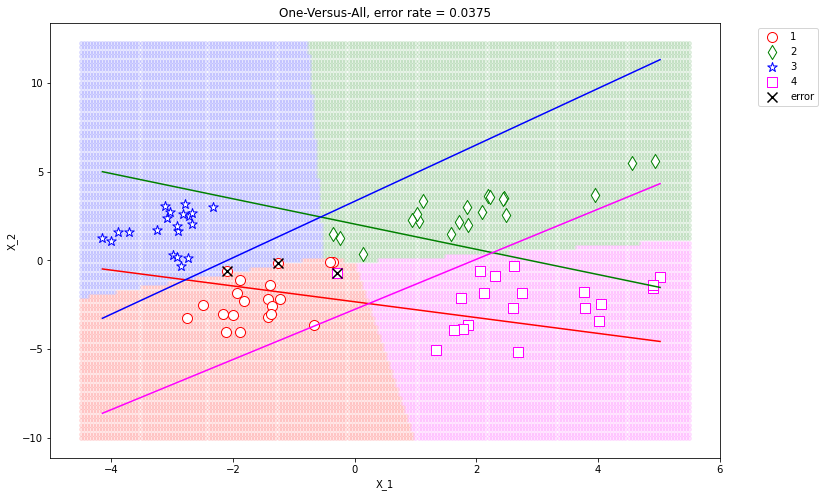

In [11]:
# Part1: One-Versus-All OVA
print("Part1: One-Versus-All (OVA)")

# Create a decision boudary dictionary that contain all w for each class vs All
w_ova = {}

# Calculate each class vs all w
for k in class_set:
    
    # Obtain y'
    y_ova = np.zeros((sample_size))
    for i in range(sample_size):
        if y_data[i] == k:
            y_ova[i] = 1
        else:
            y_ova[i] = -1
    
    # Using the Logistic Regression algorithm to calculate w for each class vs all
    w_0 = np.zeros((x_size))
    wLogisticReg = LogisticReg_algorithm(w_0, 5, x_data, y_ova, 1000)["wLogisticReg"]
    print("Class "+str(int(k))+" vs. All w: "+str(wLogisticReg))
    w_ova[k] = wLogisticReg

# Create and calculate an array of the OVA classification for each data point
ova_classification = np.zeros((sample_size)) 
for n in range(sample_size):
    ova_classification[n] = OVA_classify(w_ova, x_data[n], class_set)

# Calculate the error rate of the OVA classification
ova_error_rate = count_error_rate(ova_classification, y_data)

# Visualization of the graph of the One-Versus-All classification
OVA_visualization(w_ova, x_data, y_data, class_set, ova_classification, "One-Versus-All, error rate = "+str(ova_error_rate))

Part2: One-Versus-One (OVO)
Class 1 vs. Class 2 w: [ 0.20151258 -4.49715707 -6.35558736]
Class 1 vs. Class 3 w: [ 4.84421509  3.03537893 -6.28064987]
Class 1 vs. Class 4 w: [-0.77381141 -5.55931964  0.26627215]
Class 2 vs. Class 3 w: [1.29697055 6.02341705 2.74427773]
Class 2 vs. Class 4 w: [ 0.         -1.10105625  6.44841875]
Class 3 vs. Class 4 w: [-0.41163935 -7.20274974  5.42487085]


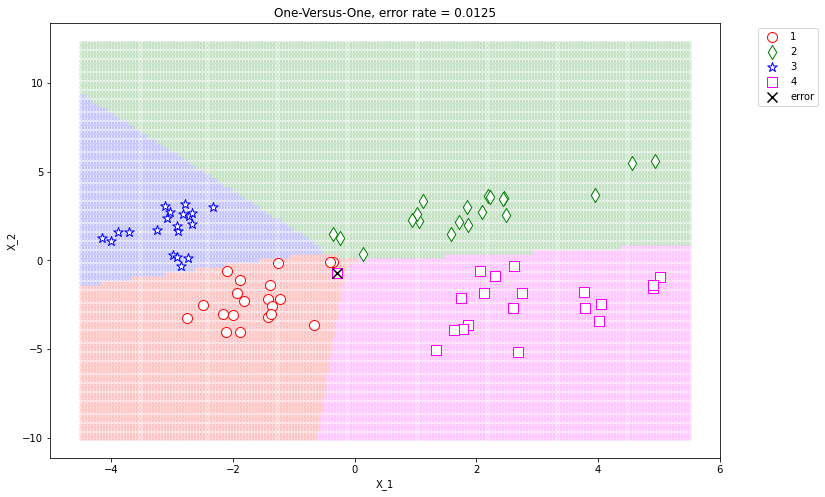

In [12]:
# Part2: One-Versus-One OVO

print("Part2: One-Versus-One (OVO)")

# Create a decision boudary matrix that contain all w for each Pairwise Classifiers
w_ovo = np.zeros((len(class_set), len(class_set), x_size))

# Obtain X' and Y' for each Pairwise Classifiers
for k in class_set:
    for l in class_set:
        
        # Ignore l-k class pair because k-l class pair has been calculated
        if l <= k:
            continue
            
        x_ovo = []
        y_ovo = []

        for i in range(sample_size):
            if y_data[i] == k:
                x_ovo.append(x_data[i])
                y_ovo.append(1)
            elif y_data[i] == l:
                x_ovo.append(x_data[i])
                y_ovo.append(-1)
        
        # Using the Logistic Regression algorithm to calculate w for each Pairwise Classifiers
        w_0 = np.zeros((x_size))
        wLogisticReg = LogisticReg_algorithm(w_0, 5, x_ovo, y_ovo, 1000)["wLogisticReg"]
        print("Class "+str(int(k))+" vs. Class "+str(int(l))+" w: "+str(wLogisticReg))
        w_ovo[int(k)-1][int(l)-1] = wLogisticReg 

# Create and calculate an array of the OVO classification for each data point
ovo_classification = np.zeros((sample_size))
for n in range(sample_size):
    ovo_classification[n] = OVO_classify(w_ovo, x_data[n], class_set)

# Calculate the error rate of the OVO classification
ovo_error_rate = count_error_rate(ovo_classification, y_data)

# Visualization of the graph of the One-Versus-One classification
OVO_visualization(w_ovo, x_data, y_data, class_set, ovo_classification, "One-Versus-One, error rate = "+str(ovo_error_rate))